In [3]:
import openslide
from openslide.deepzoom import DeepZoomGenerator

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from os import path


这里图片我用了绝对路径，你们得改改

In [5]:
slide = openslide.OpenSlide('G:/pa17/patient_017_node_1.tif')

level_dimensions=slide.level_dimensions

level_count = slide.level_count

print(level_count)
print(level_dimensions)

9
((96651, 197226), (48325, 98613), (24162, 49306), (12081, 24653), (6040, 12326), (3020, 6163), (1510, 3081), (755, 1540), (377, 770))


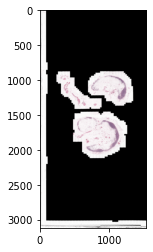

In [6]:
slide_thumbnail = slide.get_thumbnail((1528,3432))
tile = np.array(slide_thumbnail)
# scipy.misc.imsave('/home/xhj/PycharmProjects/openslide-experiment/save/thumbnail.jpg', tile)
plt.imshow(slide_thumbnail)
plt.imshow(tile)


In [7]:
data_gen = DeepZoomGenerator(slide, tile_size=40464, overlap=0, limit_bounds=False)

print(data_gen.tile_count)
print(data_gen.level_count)
#plt.imshow(data_gen.get_tile(15,(10,10)))
#plt.imshow(tile)

39
19


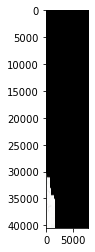

In [8]:
plt.imshow(data_gen.get_tile(17,(1,0)))
#midle_patch = data_gen.get_tile(17,(1,0))

In [9]:
midle_patch = data_gen.get_tile(17,(1,0))

In [10]:
highth = 512
data_gen1 = DeepZoomGenerator(slide, tile_size=highth, overlap=0, limit_bounds=False)

print(data_gen1.tile_count)
print(data_gen1.level_count)
plt.imshow(data_gen1.get_tile(12,(3,1)))


97540
19


ValueError: Invalid address

In [ ]:
#width = slide.level_dimensions[0][width]
#height = slide.level_dimensions[0][height]
size = data_gen1.level_dimensions[15]
print(size)

In [71]:
result_path = '/Users/ying/Documents/CIS课程/small patches/'
width =512
height=512
w=10464
h=3776
num_w = int(np.floor(w/width))+1
num_h = int(np.floor(h/height))+1
for i in range(num_w):
    for j in range(num_h):
        img = np.array(data_gen1.get_tile(15, (i, j))) #切图
        io.imsave(path.join(result_path, "02"+str(i)+'_'+str(j)+".png"), img, check_contrast=False) #保存图像
print(num_w)
print(num_h)

21
8
